<a href="https://colab.research.google.com/github/harshalkumeriya/Deep-Learning-using-Tensorflow/blob/master/ANN_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
iris = load_iris()
X = iris.data[:, (2,3)] # petal length and petal width
y = (iris.target == 0).astype(np.int) # Iris-Setosa ?

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
print(X[:50,0])
print(X[:50,1])

[1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 1.5 1.6 1.4 1.1 1.2 1.5 1.3 1.4
 1.7 1.5 1.7 1.5 1.  1.7 1.9 1.6 1.6 1.5 1.4 1.6 1.6 1.5 1.5 1.4 1.5 1.2
 1.3 1.4 1.3 1.5 1.3 1.3 1.3 1.6 1.9 1.4 1.6 1.4 1.5 1.4]
[0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 0.2 0.2 0.1 0.1 0.2 0.4 0.4 0.3
 0.3 0.3 0.2 0.4 0.2 0.5 0.2 0.2 0.4 0.2 0.2 0.2 0.2 0.4 0.1 0.2 0.2 0.2
 0.2 0.1 0.2 0.2 0.3 0.3 0.2 0.6 0.4 0.3 0.2 0.2 0.2 0.2]


In [ ]:
print(y[:50])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


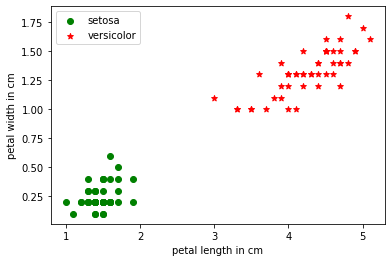

In [ ]:
plt.scatter(X[:50,0], X[:50,1], color = "green", marker= "o", label = "setosa")
plt.scatter(X[50:100,0], X[50:100,1], color = "red", marker= "*", label = "versicolor")
plt.xlabel("petal length in cm")
plt.ylabel("petal width in cm")
plt.legend()
plt.show()

In [ ]:
perceptron_clf = Perceptron()
perceptron_clf.fit(X,y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_region(X, y, classifier, resolution = 0.02):
  markers = ["s", "o", "x", "^", "v"]
  colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # plot the decision surface
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx2.shape) # same as xx1.shape
  plt.contourf(xx1, xx2, Z, alpha = 0.4, cmap = cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  #plot class examples
  for idx, cls in enumerate(np.unique(y)):
      plt.scatter(x = X[y == cls, 0],
                  y = X[y == cls, 1],
                  alpha=0.9,
                  c = colors[idx],
                  label = cls,
                  marker = markers[idx],
                  edgecolor = 'black')

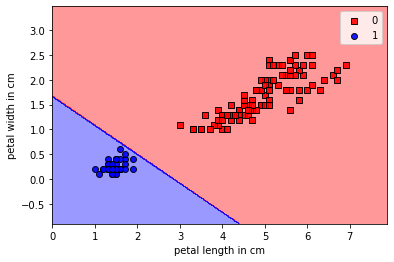

In [ ]:
plot_decision_region(X, y, classifier=perceptron_clf)
plt.xlabel("petal length in cm")
plt.ylabel("petal width in cm")
plt.legend()
plt.show()

In [1]:
# To demonstrate the same with SGDClassfier by setting hyperparameter as below

In [ ]:
sgd_clf = SGDClassifier(loss = "perceptron", eta0=1, learning_rate="constant", penalty = "None")
sgd_clf.fit(X,y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=1, fit_intercept=True,
              l1_ratio=0.15, learning_rate='constant', loss='perceptron',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='None',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

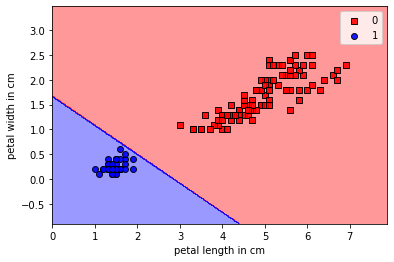

In [ ]:
plot_decision_region(X, y, classifier=perceptron_clf)
plt.xlabel("petal length in cm")
plt.ylabel("petal width in cm")
plt.legend()
plt.show()